<a href="https://colab.research.google.com/github/fintech-lex/finance-starterkit/blob/main/Welcome_2_FinWin_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: Setting the Story

### This project is aimed to create a user-friendly Financial Solution Robo planner for the marginalized communities.

### By levering newer FinTech dynamic libraries, we can deploy Machine Learning to train Robo advisors how interact with new users, providing financial planning with ease of verbiage and usage.


In [1]:
# Welcome to Finance Starter Kit! Brought to you by the Logistic Regressions!

print(f'Enjoy reviewing our Secret Project Code Name: "FinWin"')

print(f'Lets gather some data now... shall we?') # Let's make it fun for the front-end user experience with messages like this!

Enjoy reviewing our Secret Project Code Name: "FinWin"
Lets gather some data now... shall we?


In [2]:
# Fundational to Imports & Engines

import pandas as pd
from pathlib import Path
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
import json
warnings.filterwarnings('ignore')

%matplotlib inline

As a group with similar backgrounds and experience, we understand how even something so simple as a line of code, can still be difficult to comprehend or attain proficiency.


But similar to Economics and Wealth disparity existant on global and microscopic scales, technology can play a role too in helping mitigate that threat in Modern Western Capitalism.


If we're going to do something big and grand, we need to first start with the ***basics***:

In [3]:
# Foundational Parameters

def classify_age(age):
    if 18 <= age <= 30:
        return "Young"
    elif 31 <= age <= 50:
        return "Middle"
    elif 51 <= age <= 100:
        return "Old"
    else:
        return "Invalid"

# Dictionary to store newly created age classifications
age_class = {}

# Classify ages from 18 to 100 and store the results in the dictionary
for age in range(18, 101):
    classification = classify_age(age)
    age_class[age] = classification

Often times, the biggest worry is not necessarily getting the income, or getting to the bank... sometimes its something as simple as 'fear'. Or rather, knowing you need help, but don't know what are the real questions to ask, where should you start, or what should you even bring?

In the modern banking and compliance world, we call that Know Your Customer.

Important as it is to prove your Date of Birth, it should be easy as well to provide it.

We reiterate our commitment to make this is a **SMOOTH**... *EASY*... process...

In [4]:
core_solution = ['Bank', 'Invest', 'Home', 'Retire', 'Speculate'] # This will later be implemented and layered with Amazon Lambda functionality, to collect required KYC information

initial_capital = list(range(0,10000001))

In [5]:
# Lets marry all these foundational parameters and
data = {
    'Age_Group': classification,
    'Solution': core_solution,
    'Fav_Platform': ['Facebook', 'Instagram', 'Twitter', 'Reddit', 'Snapchat']
}

# Create a DataFrame from the sample dataset
df = pd.DataFrame(data)

# Let's see what we got here!

df

,Age_Group,Solution,Fav_Platform
0,Old,Bank,Facebook
1,Old,Invest,Instagram
2,Old,Home,Twitter
3,Old,Retire,Reddit
4,Old,Speculate,Snapchat


Enough kindergarden stuff (still important!), let's get in some real life data, information and historical numbers to analyze and develop the best path forward!

In [6]:
# Setting the stage for next phase of Historical CSV Ingestion & Data Manipulation

yield_file = Path('./Resources/yield-rates-1990-2021.csv')

yield_csv = pd.read_csv(yield_file, index_col=[0], parse_dates=True, infer_datetime_format=True)

yield_csv.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2021-12-31,0.06,0.05,0.06,NaN,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
2021-12-30,0.06,0.06,0.05,NaN,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2021-12-29,0.01,0.02,0.05,NaN,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-28,0.03,0.04,0.06,NaN,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-27,0.04,0.05,0.06,NaN,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88


Prophet (RIP Facebook or 'FB') is a great and simple tool to set up our modelizations needed to provide our users the ability to see the fruits of their work. Any time or money invested with us, has to be transparent in reason for ask, alongside visualizations and education provided simultaneously while interacting with our Robo Advisor.

For now, let's make sure our machine is nice and oiled up:

,ds,y
0,2021-12-31,0.06
1,2021-12-30,0.05
2,2021-12-29,0.05
3,2021-12-28,0.06
4,2021-12-27,0.06
...,...,...
8003,1990-01-08,7.79
8004,1990-01-05,7.79
8005,1990-01-04,7.84
8006,1990-01-03,7.89


19:07:08 - cmdstanpy - INFO - Chain [1] start processing
19:07:11 - cmdstanpy - INFO - Chain [1] done processing


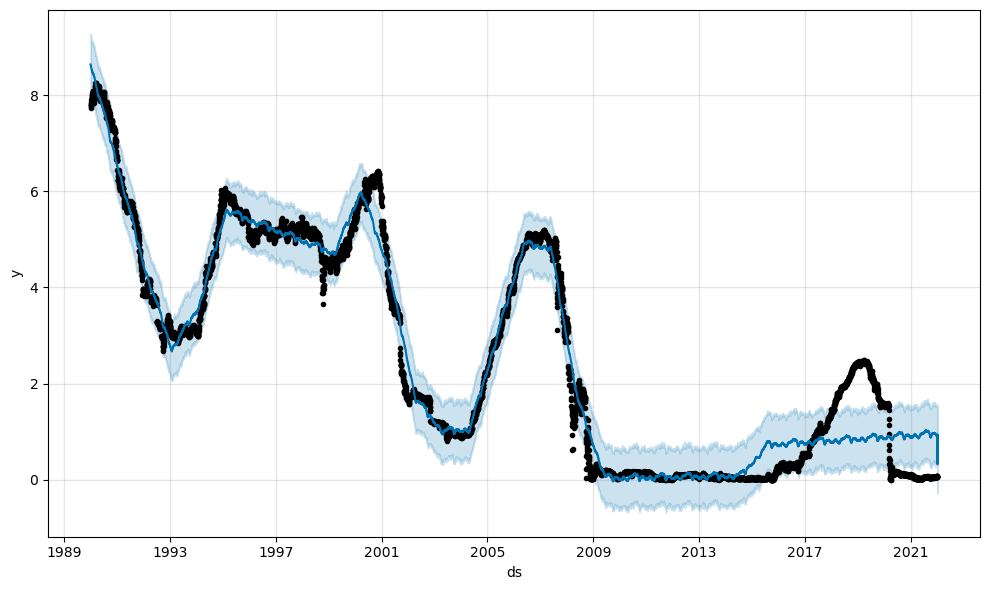

In [7]:
# Future Predictability Model

from prophet import Prophet # RIP Facebook!

# Prepare model and clean up data

new_df = yield_csv['3 Mo']

new_df = new_df.reset_index()

new_df = new_df.rename(columns={'Date': 'ds', '3 Mo': 'y'})

display(new_df)

# Model Creation

m = Prophet()
m.fit(new_df) # The New Df needs to be here. Working to convert Dates and Yields into ds and y

# Future 'indicators' Creation

future = m.make_future_dataframe(periods=4)
future.tail()

# Forecast model integrating newly

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Lets make this thing pretty! Visualization & Plots!

from prophet.plot import plot_plotly, plot_components_plotly

visual = m.plot(forecast)

Now that we have that sorted, let's ingest actual information to support our analysis on the glaring issue yet tulmutous opportunity to address and narrow the everpresent Racial Wealth Gap.

Our work, approach and analysis remains always fair, unbiased and unprejudiced.

Albeit fortunate, we have an abundance of historical data that supports that rhetoric while we attempt to find a correlation between actual Market Conditions & Performance, unilaterally with the Racial Wealth Gap.

In [8]:
# Let's focus on the parameters and dataset needed to support our analysis into the Racial Wealth Gap

inequality_file = Path('./Resources/Income_Inequality.csv')

inequality_csv = pd.read_csv(inequality_file)

display(inequality_csv.head())

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,10.76700,10.76700,10.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,24.45400,28.94534,28.945340,28.945340,28.945340,28.945340,28.877330,28.877330,28.87733,28.87733,28.87733,28.87733
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,18.33096,18.33096,12.237393,12.237393,12.237393,12.237393,12.237393,12.237393,13.17898,13.17898,13.17898,13.17898
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's tag in a friend shall we!

But before we proceed, special shoutouts to our team's resident Exterior Designer & Project Visionary - Patricia Fuglo alongside our extroadinary Master of Risk vs Return, the legendary Jordi Salas!

In [9]:
print(f'Team 2 Logistic Regressions Rule!!!!')

Team 2 Logistic Regressions Rule!!!!


Moving along, we recognize from personal shared experiences, that often times people who are marginalized and vulnerable often fall prey to "too good, to be true schemes".

While everyone wants to be rich, regardless of inheritance or present/past generational prosperity, our mission to not only advise clients and users about making the right choices suited towards their financial goals and appropriate risk tolerance, but also EDUCATE while INNOVATE-ing, the entire Financial Planning process.

Nothing assists in delivering a better experience and impact than visual aids, accompanied by friendly hard-coded software Virtual Assistants to explain it better than a Google search!

In [10]:
initial_investment = 1000 #Initial Investment is set at $1000 but can be adjust to replicate any example

# Change Weights to accomodate preferred risk tolerance style of Investment Profile

# Portfolio with more moderate-aggressive style (Mix of Stocks/Crypto - Best for Accumulation Stage
risky_weight = [.1,.2,0,0,.7]
risky_port_returns = wkly_pct_change.dot(risky_weight)

risky_returns = (1 + risky_port_returns).cumprod()

# Portfolio with high speculative, volatile tolerance in search of higher returns aka 'Get Rich Quick'.
riskiest_returns = [0,.2,0,.1,.7]
riskiest_port_returns = wkly_pct_change.dot(riskiest_returns)

riskiest_returns = (1 + riskiest_port_returns).cumprod()

high_risk_portfolio = initial_investment * risky_returns
high_risk_portfolio.plot()

too_risky_portfolio = initial_investment * riskiest_returns
too_risky_portfolio.plot(title='Are you sure you can tolerate the "get rich" risk?')


NameError: name 'wkly_pct_change' is not defined

In [ ]:
## Mission Name - Solitaire

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

wkly_close_etf3=pd.read_csv('./Resources/WKLY_ETF_close_prices.csv',index_col = "date", infer_datetime_format = True, parse_dates = True).sort_index(ascending=True)
wkly_close_etf3

# Clean Up Data
wkly_close_etf3.isnull().sum()

# Isolate Volatility
wkly_pct_change=wkly_close_etf3.pct_change()
wkly_pct_change

wkly_pct_change=wkly_pct_change.dropna() # Removing all nulls and blahs
wkly_pct_change

cumulative_returns=(1+wkly_pct_change).cumprod() # Almost done and making pretty!

One of the biggest cardinal rules in Finance (especially after all those ponzis and news headline tragedies!), is to always keep the client's best interest at heart (this wasn't always a rule funny enough), yet, how can we have their best interest at heart if we give them all the same medicine?

Everyone, is unique and special; REGARDLESS of their ethnic, racial, religious, economic, sexual, or whatever socially constructed background, whom DESERVE their own holistically curated financial solution.

Lucky for them, we have developed CORE SOLUTIONS, that should address the majority of our targeted audience.

Remeber what I said about visual aids? 🙂

In [ ]:
cumulative_returns=(1+wkly_pct_change).cumprod()

risk_plot=cumulative_returns
risk_plot.boxplot(figsize=(20,5))

In [ ]:
# Portfolio modeled after Least Risk Profile with more Passive/Convervative ETF $SPY, $QQQ, $DIA
safe_weights = [.33,.33,.33,0,0]
safe_port_returns = wkly_pct_change.dot(safe_weights)

safe_returns = (1 + safe_port_returns).cumprod()

safe_portfolio = initial_investment * safe_returns
safe_portfolio.plot()

# Moderate / Equality Weighted Portfolio
equal_weights = [.2,.2,.2,.2,.2]
moderate_port_returns= wkly_pct_change.dot(equal_weights)

moderate_returns = (1 + moderate_port_returns).cumprod()

equal_distrubition_portfolio = initial_investment * moderate_returns
equal_distrubition_portfolio.plot()

# DIA Least Volatile
least_volatile = [0,0,1,0,0]
least_port_returns= wkly_pct_change.dot(least_volatile)

least_returns = (1 + least_port_returns).cumprod()

least_port = initial_investment * least_returns
least_port.plot()

ax = high_risk_portfolio.plot(figsize=(20,10))
low_risk_portfolio.plot(ax=ax)
equal_distrubition_portfolio.plot(ax=ax)
safe_portfolio.plot(ax=ax)
least_port.plot(ax=ax)

ax.legend(['Moderate Agressive / Retire Early',
           'High Speculative / Get Rich',
           'Moderate Blend / Save Money',
           'Equal Weighted / Partipation Award',
           'Dow Jones / Least Volatile'])